# Forecasting Time Series Data using Kalman Filter Algorithm

In [40]:
from darts import TimeSeries
from darts.models import KalmanFilter, FFT, ExponentialSmoothing, AutoARIMA

In [35]:
milk_model = ExponentialSmoothing(seasonal_periods=12)
milk_ts = TimeSeries.from_dataframe(milk.reset_index(), 
                                    time_col='month', value_cols='production', freq='MS')

In [101]:
milk.shape

(168, 1)

In [110]:
test_split = 0.15
l = len(milk)
t_idx = l - round(l*test_split)
milk_train = milk_ts.diff()[ : t_idx]
milk_test = milk_ts.diff()[t_idx : ]
# milk_train, milk_test = split_data(milk_ts.diff(), p)

In [111]:
milk_model.fit(milk_train)
milk_pred = milk_model.predict(len(milk_test), num_samples=1000)

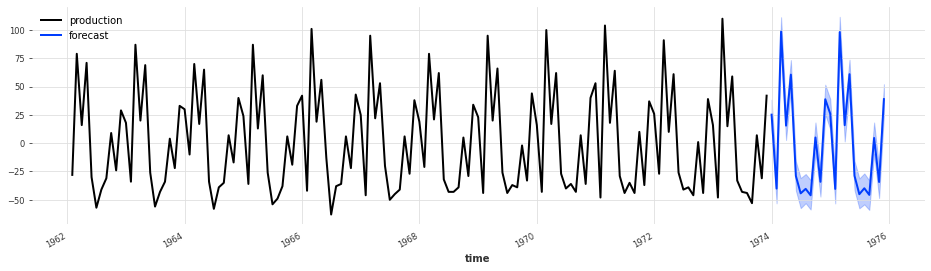

In [112]:
milk_train.plot()
milk_pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [116]:
milk_filtered = KalmanFilter().filter(milk_ts.diff())
milk_model_filtered = ExponentialSmoothing(seasonal_periods=12)

p = 0.15
# milk_train_filtered, milk_test_filtered = split_data(milk_filtered, p)
milk_train_filtered = milk_filtered[ : t_idx]
milk_test_filtered = milk_filtered[t_idx : ]

In [117]:
milk_model_filtered.fit(milk_train_filtered)
milk_pred_filtered = milk_model_filtered.predict(len(milk_test), num_samples=1000)

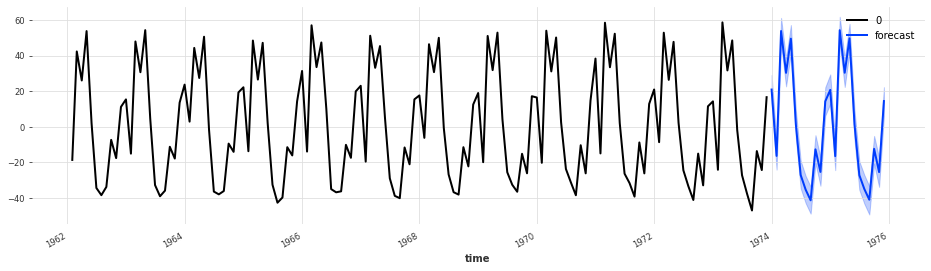

In [118]:
milk_train_filtered.plot()
milk_pred_filtered.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

# Forecasting Time Series with Multiple Seasonal Components using TBATS

In [13]:
from sktime.forecasting.tbats import TBATS

In [14]:
web = Path('../../datasets/Ch9/web_traffic.csv')
weather = Path('../../datasets/Ch9/weather.csv')
elec = Path('../../datasets/Ch9/vic_elec.csv')

In [15]:
electdemand = pd.read_csv(elec, 
                          index_col='Time', 
                          parse_dates=True,
                         usecols=['Time', 'Demand', 'Temperature'])

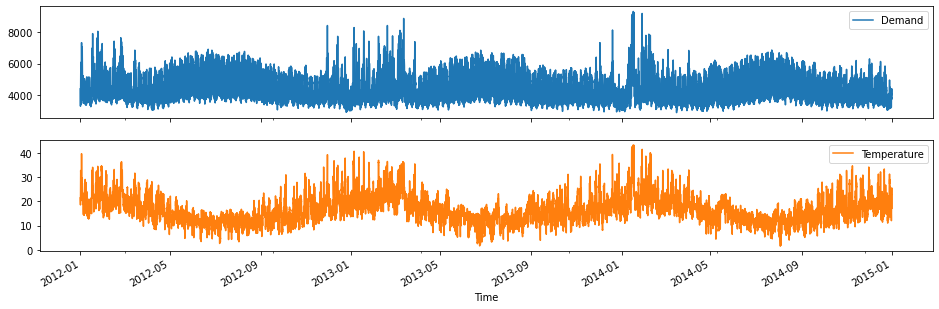

In [16]:
electdemand.plot(subplots=True,figsize=(16, 5)); plt.show()

In [17]:
elect2014 = electdemand['Demand'].loc['2014':]

In [21]:
elect2014 = elect2014.sort_index()

In [45]:
train, test = split_data(elect2014, 0.75)

train: 4380 , test: 13140


In [23]:
model = TBATS(sp=[14, 30.5], n_jobs=1, use_box_cox=False, use_trend=False, use_damped_trend=False)

In [46]:
model = TBATS()

In [47]:
model.fit(train)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=True, sp=None, use_arma_errors=True,
      use_box_cox=None, use_damped_trend=None, use_trend=None)

In [41]:
model.predict(fh=[1,2,3])

In [39]:
test.index[0:3].values.tolist()

[1407452400000000000, 1407454200000000000, 1407456000000000000]

In [48]:
model.check_is_fitted()

In [49]:
model.get_fitted_params()

{'a': None, 'i': None, 'c': None}

In [42]:
model.get_test_params()

**Using `diff` from `statsmodels`**

In [15]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [16]:
milk.diff(1).head()

,production
month,
1962-01-01,NaN
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0


<AxesSubplot:xlabel='month'>

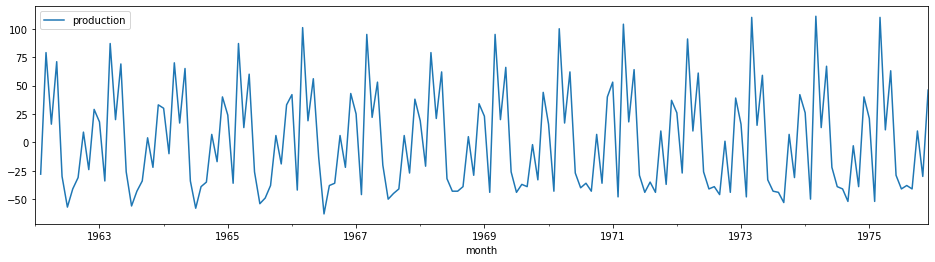

In [17]:
milk.diff(1).plot()

<AxesSubplot:xlabel='month'>

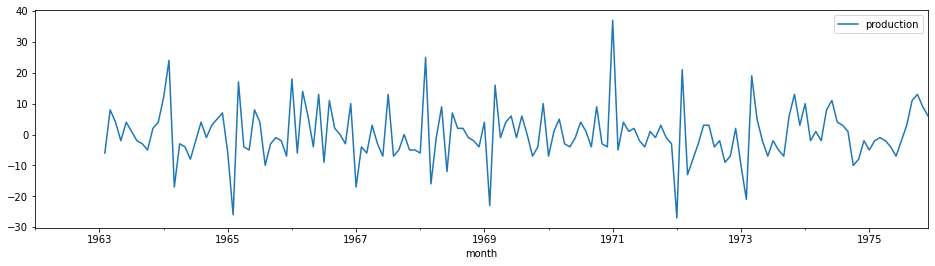

In [18]:
# twice differencing 
milk.diff(12).diff(1).plot()

In [19]:
diff(milk ,k_diff=1).head()

,production
month,
1962-02-01,-28.0
1962-03-01,79.0
1962-04-01,16.0
1962-05-01,71.0
1962-06-01,-30.0


<AxesSubplot:xlabel='month'>

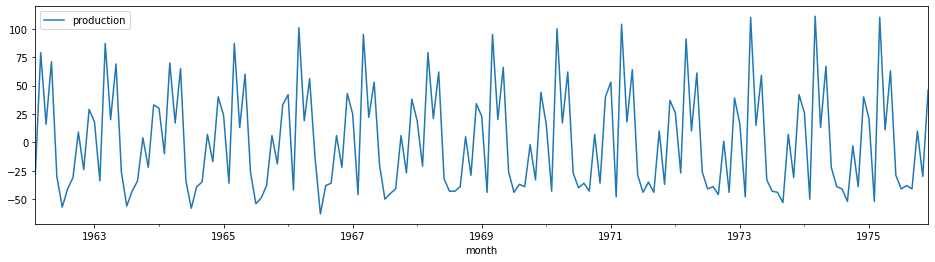

In [20]:
diff(milk ,k_diff=1).plot()

In [22]:
milk.diff(12).diff(1).dropna().head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [23]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [24]:
diff(milk, k_diff=1, k_seasonal_diff=1, seasonal_periods=12).head()

,production
month,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0


In [25]:
from statsmodels.tsa.stattools import acf, pacf, acovf, pacf_ols, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf, seasonal_plot
from scipy.stats import pearsonr

In [26]:
acf(milk, fft=False, nlags=10)

array([1.        , 0.89157378, 0.77817897, 0.62027149, 0.48666361,
       0.4281481 , 0.37606367, 0.41477252, 0.45425153, 0.56181499,
       0.68655906])

In [27]:
pearsonr(milk.values.ravel(), milk.values.ravel())

(1.0, 0.0)

In [29]:
for i in range(0, 11):
    d = milk.shift(i).dropna()
    m = milk.iloc[i:]
    p = pearsonr(m.values.ravel(), d.values.ravel())
    print(p[0])

1.0
0.9007955369510077
0.7956520464161647
0.6380100541047523
0.5030171621999081
0.44441611731441033
0.3937119642439715
0.44127243314740167
0.495161590176578
0.6248312041652151
0.777619915657277


**PACF and ACF**

In [30]:
m = milk.copy()
m.index.freq = 'MS'
m.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


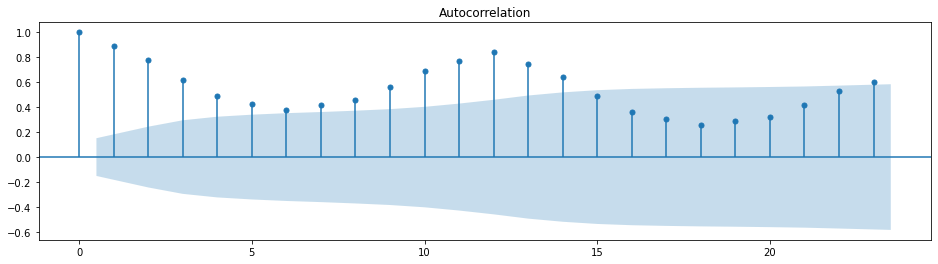

In [31]:
plot_acf(milk);

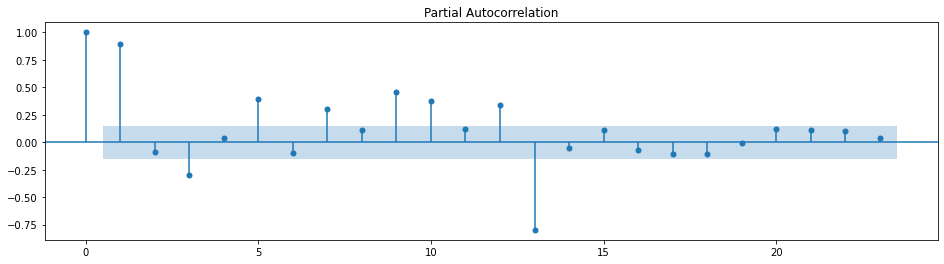

In [32]:
plot_pacf(milk);

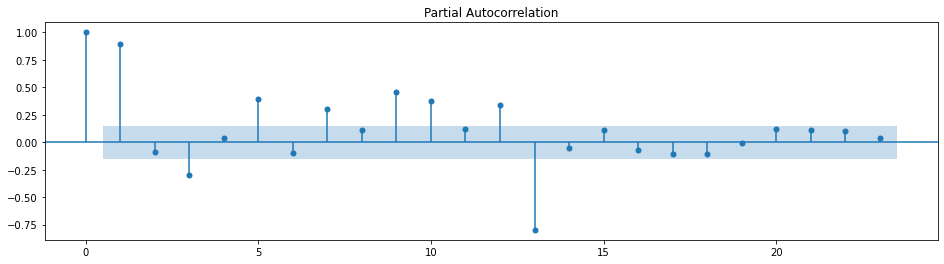

In [33]:
plot_pacf(milk, method='ywunbiased');

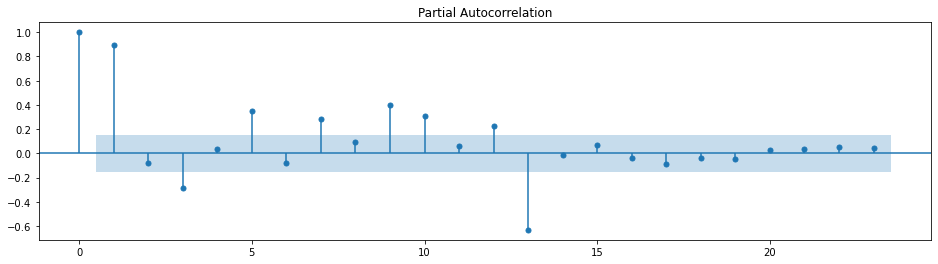

In [34]:
plot_pacf(milk, method='ywmle');

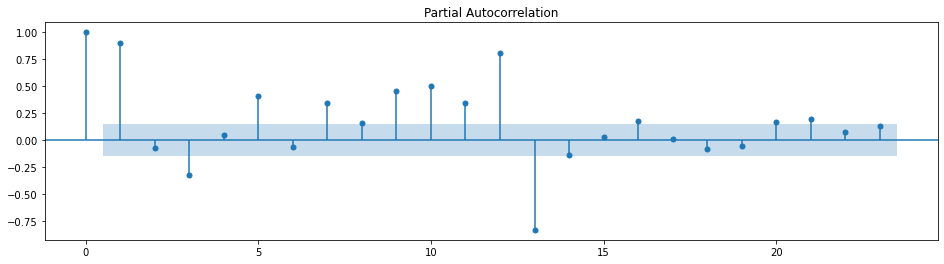

In [35]:
plot_pacf(milk, method='ols');

In [36]:
pacf(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [37]:
# same as pacf_yw(milk, nlags=13)
# same as pacf(milk, nlags=13)
# same as pacf_yw(milk, nlags=13, method='unbiased')
pacf(milk, nlags=13, method='ywunbiased')

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [38]:
# same as pacf_yw(milk, nlags=13, method='mle')
pacf(milk, nlags=13, method='ywm') 

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [39]:
# same as pacf_ols(milk, nlags=13)
pacf(milk, nlags=13, method='ols')

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [40]:
pacf_ols(milk, nlags=13)

array([ 1.        ,  0.89565037, -0.07631617, -0.32685497,  0.0457326 ,
        0.41087767, -0.06138829,  0.34828073,  0.15525516,  0.45722816,
        0.49807693,  0.34232677,  0.8083725 , -0.83259086])

In [41]:
pacf_yw(milk, nlags=13)

array([ 1.        ,  0.89691254, -0.08641102, -0.30065408,  0.03704353,
        0.38861552, -0.09669472,  0.30386494,  0.10921593,  0.46009995,
        0.37723165,  0.1203746 ,  0.33930438, -0.79801803])

In [42]:
pacf_yw(milk, nlags=13, method='mle')

array([ 1.        ,  0.89157378, -0.08154629, -0.2817671 ,  0.03221593,
        0.35025969, -0.08222765,  0.28348199,  0.09187587,  0.39909094,
        0.30447405,  0.06273194,  0.22236459, -0.63184881])

In [43]:
from pandas.plotting import autocorrelation_plot, lag_plot

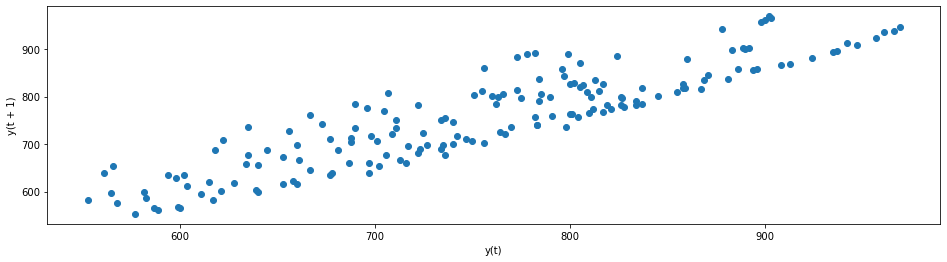

In [44]:
lag_plot(milk);

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

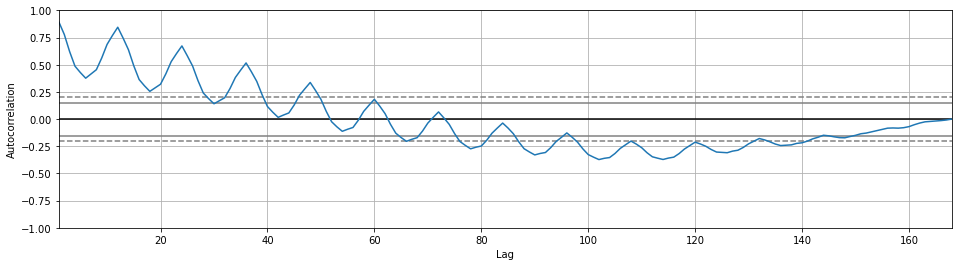

In [45]:
autocorrelation_plot(milk)